In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
filename="C:\\Users\\birad\OneDrive\\Documents\\Heart_attack_Dataset_Kaggle_Notepad.csv"
df = pd.read_csv(filename)

In [3]:
def Outliner_info(quart_v):
    print("----------------for",quart_v,"-------------------")
    Q1,Q2,Q3 = df[quart_v].quantile([0.25,0.50,0.75]) 
    quartiles = [Q1,Q2,Q3]
    IQR = Q3 - Q1
    lower_b = Q1 - 1.5*IQR
    upper_b = Q3 + 1.5*IQR
    print(["Q1","Q2  ","Q3 ","IQR","lower_b  ","upper_b"])
    print([Q1,Q2,Q3,IQR,lower_b,upper_b])
    #value lesser than lower_b and values greater than upper_b are considered as outliners
    lower_index = np.where(df[quart_v] <= lower_b)
    upper_index = np.where(df[quart_v] >= upper_b)
    print("index for lower outliners: ", lower_index)
    print("index for upper outliners: ",upper_index) 
    mean = df[quart_v].mean()
    print("mean of ",quart_v,"=",mean)
    val_list = []
    for val in df[quart_v]:
        if val >= upper_b:
            val_list.append(val)
    print("val_list = ",val_list)   

In [4]:
df1 = df.drop([85], axis = 0, inplace = False) 
df1.at[28,"chol"]= 369 
df1.at[96,"chol"]= 369 
df1.at[220,"chol"]= 369 
df1.at[246,"chol"]= 369

In [5]:
df1.drop([248,223], axis = 0, inplace = True)

In [6]:
temp_list = [  8, 101, 110, 152, 195, 203, 228, 241, 260, 266, 292]
for i in temp_list:
    df1.at[i,"trtbps"]=170

In [7]:
df1.at[272,"thalachh"] = 84

In [8]:
temp_list1 = [101, 204, 220, 221, 250, 291, 295]
for j in temp_list1:
    df1.at[j,"oldpeak"]= 4.0

In [9]:
temp_list2 = [ 92, 158, 163, 164, 251]
for k in temp_list2:
    df1.at[k,"caa"]= 3

In [10]:
df1.at[48,"thall"]=1
df1.at[281,"thall"]=1

In [11]:
duplicate_rows = df1[df1.duplicated()]
duplicate_rows

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,3,2,1


In [12]:
df1.duplicated().sum()
df1 = df1.drop_duplicates()

In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [14]:

# Split the data into features and labels
X = df1.iloc[:, :-1].values
y = df1.iloc[:, -1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
from sklearn.linear_model import LogisticRegression

# train the model
lr_1 = LogisticRegression()

#fitting the model to the training set.
lr_1.fit(X_train, y_train) 

# make predictions on the test dataset
y_pred_1 = lr_1.predict(X_test)

#---------------------------------Evaluating the model---------------------------------

# Evaluate the model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("\n----------Initial Logistic Regression Metrics----------\n")
print("Accuracy:", accuracy_score(y_test, y_pred_1))
print("Precision:", precision_score(y_test, y_pred_1))
print("Recall:", recall_score(y_test, y_pred_1))
print("F1 Score:", f1_score(y_test, y_pred_1))
#meaning of accuracy score: 0.9 means 90% of the predictions are correct

#classification_report
print("\n----------Initial Classification Report----------\n")
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred_1)
print(cr)


----------Initial Logistic Regression Metrics----------

Accuracy: 0.9333333333333333
Precision: 0.9444444444444444
Recall: 0.9444444444444444
F1 Score: 0.9444444444444444

----------Initial Classification Report----------

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.94      0.94      0.94        18

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [16]:
from sklearn.model_selection import GridSearchCV
#creating a dictionary of parameters to be used in the grid search:
param_grid = {'C': [0.0001,0.001, 0.01],
                'solver': ['liblinear','saga', 'sag', 'lbfgs', 'newton-cg','newton-cholesky'],
                'max_iter': [100],
                'random_state': [42]
                }
#creating an instance of the GridSearchCV class:
grid = GridSearchCV(LogisticRegression(), param_grid, cv = 5, scoring='f1')

#fitting the grid search to the training set:
lr_tuned = grid.fit(X_train, y_train)
#finding the best estimator:
print("\nbest estimator: ", lr_tuned.best_estimator_)
#finding the best score:
print("best score:  ", lr_tuned.best_score_)



best estimator:  LogisticRegression(C=0.01, random_state=42, solver='saga')
best score:   0.8474126492702345


C:\Users\birad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\birad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\birad\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\birad\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 434, in _check_solver
    raise ValueError(
Valu

In [17]:
y_pred = lr_tuned.predict(X_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

Accuracy: 0.9333333333333333
Precision: 0.9444444444444444
Recall: 0.9444444444444444
F1 Score: 0.9444444444444444
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.94      0.94      0.94        18

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



[[11  1]
 [ 1 17]]


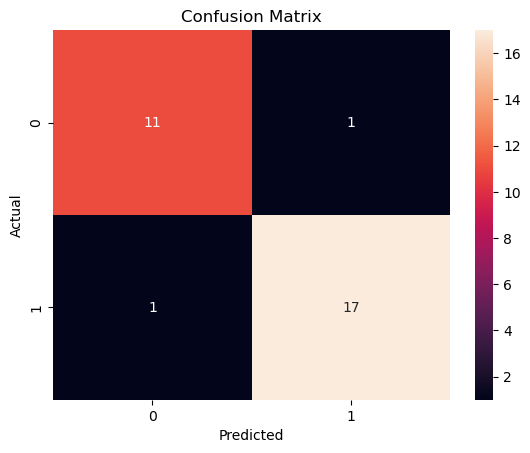

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm, annot=True, fmt="d") 
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [19]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr_tuned, X_train, y_train, cv=10, scoring="f1") 
for i in range(10):
    print("Fold", i, ":", scores[i])
print("\nMean:", scores.mean())
print("Standard Deviation:", scores.std())
print("Variance:", scores.var())

C:\Users\birad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\birad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\birad\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\birad\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 434, in _check_solver
    raise ValueError(
Valu

C:\Users\birad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\birad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\birad\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\birad\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 434, in _check_solver
    raise ValueError(
Valu

Fold 0 : 0.8823529411764706
Fold 1 : 0.7878787878787877
Fold 2 : 0.8666666666666667
Fold 3 : 0.8387096774193549
Fold 4 : 0.8749999999999999
Fold 5 : 0.8387096774193549
Fold 6 : 0.7741935483870968
Fold 7 : 0.8666666666666666
Fold 8 : 0.896551724137931
Fold 9 : 0.8387096774193549

Mean: 0.8465439367171683
Standard Deviation: 0.03776634069891011
Variance: 0.0014262964897861544


C:\Users\birad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\birad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\birad\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\birad\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 434, in _check_solver
    raise ValueError(
Valu

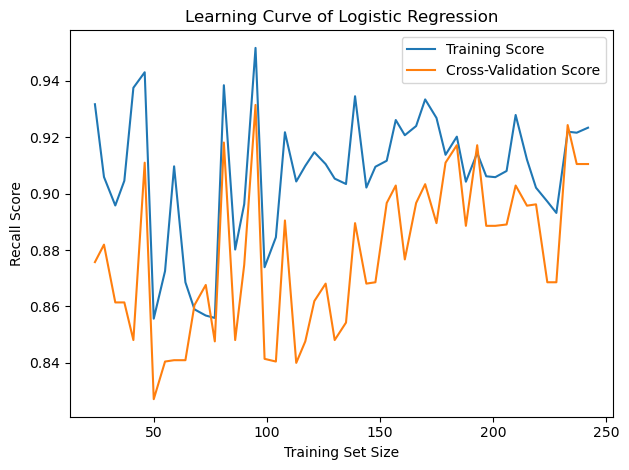

In [20]:
from sklearn.model_selection import learning_curve
import numpy as np
train_sizes, train_scores, test_scores = learning_curve(lr_tuned, X_train, y_train, cv=10, scoring="recall",n_jobs=-1, train_sizes=np.linspace(0.1,1.0,num=50))
import matplotlib.pyplot as plt
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Training Score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Cross-Validation Score")
plt.title("Learning Curve of Logistic Regression")
plt.xlabel("Training Set Size")
plt.ylabel("Recall Score")
plt.legend(loc="best")
plt.tight_layout() 
plt.show()

In [22]:
#ROC

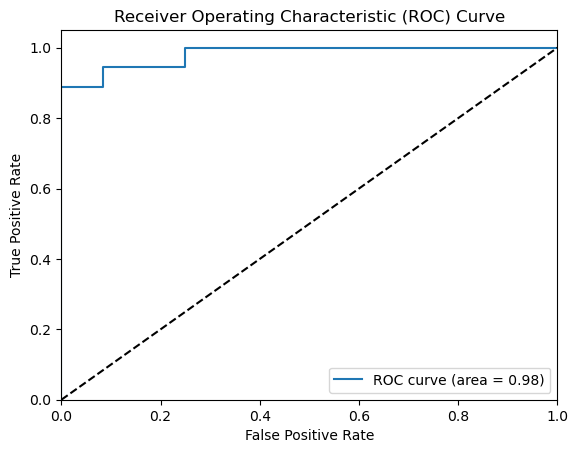

In [21]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load your data into X_test and y_test
# Assuming your Gradient Boosting model is named 'best_gb'

# Get the predicted probabilities for the test data
y_proba = lr_tuned.predict_proba(X_test)[:,1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [23]:
#prc

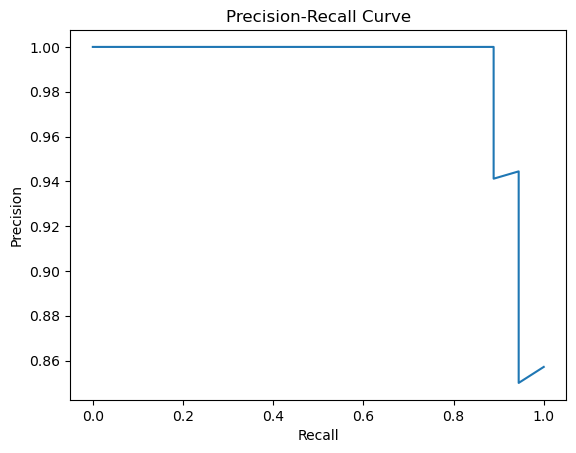

In [25]:
from sklearn.metrics import precision_recall_curve


# Get the predicted probabilities for the test data
y_proba = lr_tuned.predict_proba(X_test)[:,1]

# Calculate the precision-recall curve values
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Plot the precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()